In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
import numpy as np
import os
import csv
import math
from scipy import stats, optimize, interpolate
import scipy

In [57]:
startingDir = 'outputDatasetTestPlots'
startingDirRust = 'outputDatasetRust'
printFlag = True
errorsFlag = False
bobsNumberTestData = {}

In [58]:
def confInt(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return round((m-h), 2), round((m+h), 2)


def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x, y)

def printResults(data):
    print('Test ' + str(data['bobsNumber']) + ' bobs, Thr ' + str(data['thresholdNumber']) +
        ':\t StoreDLT avg=' + str(round(np.mean(data['storeDLT']), 2)) +
        'ms,confint=' + str(confInt(data['storeDLT'])) +
        'ms,\t StoreKf avg=' + str(round(np.mean(data['storeKfrags']), 2)) +
        'ms,confint=' + str(confInt(data['storeKfrags'])) +
        'ms,\t GetCf avg=' + str(round(np.mean(data['getCfrags']), 2)) +
        'ms,confint=' + str(confInt(data['getCfrags'])) +
        #',\t Std= ' + str(round(np.std(data['values']), 2)) +
        'ms,\t Err%= ' +
        str(round(
            (data['errors'] / (data['errors'] + len(data['getCfrags'])))*100, 2)))

In [59]:
path = os.walk(startingDir)
startDir = next(path)
startDir[1].sort(key=lambda x: int(x))
for bobsNumberString in startDir[1]:
    bobsNumber = int(bobsNumberString)
    bobsNumberDir = next(os.walk(startDir[0] + '/' + bobsNumberString))
    bobsNumberDir[1].sort()
    for thresholdString in bobsNumberDir[1]:
        thresholdNumber = int(thresholdString)
        thresholdTestData = {
            'singleTests': [],
            'storeDLT': [],
            'storeKfrags': [],
            'getCfrags': [],
            'errors': 0,
            'bobsNumber': bobsNumber,
            'thresholdNumber': thresholdNumber,
        } 
        thresholdNumberDir = os.walk(bobsNumberDir[0] + '/' + thresholdString)
        next(thresholdNumberDir)
        for testDirectory in thresholdNumberDir:
            singleTestData = {
                'bobs': [],
                'storeDLT': [],
                'storeKfrags': [],
                'getCfrags': [],
                'errors': 0,
                'name': testDirectory[0].split('/')[-1],
                'bobsNumber': bobsNumber,
                'thresholdNumber': thresholdNumber,
            }
            for singleBobString in testDirectory[2]:
                singleBobTestData = {
                    'storeDLT': [],
                    'storeKfrags': [],
                    'getCfrags': [],
                    'errors': 0,
                    'name': testDirectory[0].split('/')[-1],
                    'bobsNumber': bobsNumber,
                    'thresholdNumber': thresholdNumber,
                }
                with open(testDirectory[0]+'/'+singleBobString, 'r') as singleBobCSV:
                    reader = csv.reader(singleBobCSV)
                    next(reader)
                    for row in reader:
                        counter = int(row[0])
                        start = int(row[1])
                        storeDLT = int(row[2])
                        storeKfrags = int(row[3])
                        finish = int(row[4])
                        if finish == -1:
                            singleBobTestData['errors'] += 1
                            thresholdTestData[4] += 1
                        else:
                            # storeDLT
                            storeDLTRes = storeDLT - start
                            singleBobTestData['storeDLT'].append(storeDLTRes)
                            singleTestData['storeDLT'].append(storeDLTRes)
                            thresholdTestData['storeDLT'].append(storeDLTRes)
                            # storeKfrags
                            storeKfragsRes = storeKfrags - storeDLT
                            singleBobTestData['storeKfrags'].append(storeKfragsRes)
                            singleTestData['storeKfrags'].append(storeKfragsRes)
                            thresholdTestData['storeKfrags'].append(storeKfragsRes)
                            # getCfrags
                            getCfragsRes = finish - storeKfrags
                            singleBobTestData['getCfrags'].append(getCfragsRes)
                            singleTestData['getCfrags'].append(getCfragsRes)
                            thresholdTestData['getCfrags'].append(getCfragsRes)
                    singleTestData['bobs'].append(singleBobTestData)
                singleBobCSV.close()
                '''
                lenTC = len(singleBobTestData['getCfrags']) + singleBobTestData['errors']
                if lenTC != cycles:
                    print('Check: ' + testDirectory[0] +
                        ' ' + str(lenTC) + '/' + str(cycles))
                    errorsNotWritten = cycles - lenTC
                    singleBobTestData['errors'] += errorsNotWritten
                    thresholdTestData[4] += errorsNotWritten
                '''
            thresholdTestData['singleTests'].append(singleTestData)
        if printFlag:
            printResults(thresholdTestData)
        if bobsNumberString not in bobsNumberTestData:
            bobsNumberTestData[bobsNumberString] = []
        bobsNumberTestData[bobsNumberString].append(thresholdTestData)


Test 10 bobs, Thr 1:	 StoreDLT avg=4552.05ms,confint=(4362.41, 4741.69)ms,	 StoreKf avg=455.55ms,confint=(426.54, 484.56)ms,	 GetCf avg=943.99ms,confint=(795.87, 1092.11)ms,	 Err%= 0.0
Test 10 bobs, Thr 2:	 StoreDLT avg=4060.01ms,confint=(3894.29, 4225.73)ms,	 StoreKf avg=415.98ms,confint=(405.3, 426.66)ms,	 GetCf avg=1533.92ms,confint=(1349.33, 1718.51)ms,	 Err%= 0.0
Test 10 bobs, Thr 3:	 StoreDLT avg=5447.91ms,confint=(5028.99, 5866.83)ms,	 StoreKf avg=408.33ms,confint=(390.23, 426.43)ms,	 GetCf avg=2770.18ms,confint=(2540.88, 2999.48)ms,	 Err%= 0.0
Test 20 bobs, Thr 1:	 StoreDLT avg=5278.16ms,confint=(4983.83, 5572.5)ms,	 StoreKf avg=953.91ms,confint=(805.97, 1101.85)ms,	 GetCf avg=1057.35ms,confint=(909.91, 1204.79)ms,	 Err%= 0.0
Test 20 bobs, Thr 2:	 StoreDLT avg=5325.6ms,confint=(5097.46, 5553.75)ms,	 StoreKf avg=1028.05ms,confint=(858.64, 1197.46)ms,	 GetCf avg=2007.36ms,confint=(1808.4, 2206.31)ms,	 Err%= 0.0
Test 20 bobs, Thr 3:	 StoreDLT avg=5593.77ms,confint=(5345.26, 5842.2

In [60]:
tNum = len(bobsNumberTestData[list(bobsNumberTestData.keys())[0]])
tNum

3

In [61]:
#Prepare data for plots
# The sum of all latencies
allLatencies = [[] for x in range(tNum * len(bobsNumberTestData))]
avg = np.zeros(tNum * len(bobsNumberTestData))
errLines = np.zeros(tNum * len(bobsNumberTestData))
err = np.zeros(tNum * len(bobsNumberTestData))
# Only store DLT
sdLatencies = [[] for x in range(tNum * len(bobsNumberTestData))]
sdAvg = np.zeros(tNum * len(bobsNumberTestData))
sdErrLines = np.zeros(tNum * len(bobsNumberTestData))
sdErr = np.zeros(tNum * len(bobsNumberTestData))
sdLatenciesPerThresh = [[] for x in range(tNum)]
# Only store kfrags
skLatencies = [[] for x in range(tNum * len(bobsNumberTestData))]
skAvg = np.zeros(tNum * len(bobsNumberTestData))
skErrLines = np.zeros(tNum * len(bobsNumberTestData))
skErr = np.zeros(tNum * len(bobsNumberTestData))
skLatenciesPerThresh = [[] for x in range(tNum)]
# Only store cfrags
gcLatencies = [[] for x in range(tNum * len(bobsNumberTestData))]
gcAvg = np.zeros(tNum * len(bobsNumberTestData))
gcErrLines = np.zeros(tNum * len(bobsNumberTestData))
gcErr = np.zeros(tNum * len(bobsNumberTestData))
gcLatenciesPerThresh = [[] for x in range(tNum)]
# For labels
nmbrs = []
trslds = []
sumNum = 0
flag = False
for bobsNumber in bobsNumberTestData:
    bobsNumberXData = bobsNumberTestData[bobsNumber]
    mulNum = 0
    for thresholdXData in bobsNumberXData:
        tmpSD = np.array(thresholdXData['storeDLT'])
        tmpSK = np.array(thresholdXData['storeKfrags'])
        tmpGC = np.array(thresholdXData['getCfrags'])
        tmp = np.add(np.add(tmpSD,tmpSK),tmpGC)
        # All
        allLatencies[sumNum+mulNum] = tmp
        avg[mulNum+sumNum] = round(np.mean(tmp), 2)
        errLines[sumNum+mulNum] = avg[mulNum+sumNum] - confInt(tmp, .95)[0]
        #errLines[sumNum+mulNum] = round(np.std(tmp), 2)
        # Store DLT
        sdLatencies[sumNum+mulNum] = tmpSD
        sdAvgTmp = round(np.mean(tmpSD), 2)
        sdAvg[mulNum+sumNum] = sdAvgTmp
        sdErrLines[sumNum+mulNum] = sdAvgTmp - confInt(tmpSD, .95)[0]
        sdLatenciesPerThresh[mulNum].append(sdAvgTmp)
        # Store Kfrags
        skLatencies[sumNum+mulNum] = tmpSK
        skAvgTmp = round(np.mean(tmpSK), 2)
        skAvg[mulNum+sumNum] = skAvgTmp
        skErrLines[sumNum+mulNum] = skAvgTmp - confInt(tmpSK, .95)[0]
        skLatenciesPerThresh[mulNum].append(skAvgTmp)
        # Get Cfrags
        gcLatencies[sumNum+mulNum] = tmpGC
        gcAvgTmp = round(np.mean(tmpGC), 2)
        gcAvg[mulNum+sumNum] = gcAvgTmp
        gcErrLines[sumNum+mulNum] = gcAvgTmp - confInt(tmpGC, .95)[0]
        gcLatenciesPerThresh[mulNum].append(gcAvgTmp)
        # Errors
        err[mulNum+sumNum] = thresholdXData['errors'] / (len(thresholdXData['getCfrags']) + thresholdXData['errors'])
        mulNum += 1
        if not flag:
            trslds.append(str(thresholdXData['thresholdNumber']))
    flag = True
    nmbrs.append(bobsNumber)
    sumNum += tNum
# Create x values and labels     
startNum = .5
width = .6
distWidth = .05
positions = []
labels = []
labelsWithoutSpaces = []
for x in range(len(bobsNumberTestData)):
    a = startNum + width
    positions.append(a)
    if tNum == 1:
        labels.append(str(nmbrs[x]))
    else:
        labels.append('  ')
    for y in range(tNum - 1):
        b = a + width + distWidth
        positions.append(b)
        if y == math.floor(tNum / 2) - 1:
            labels.append(str(nmbrs[x]))
            labelsWithoutSpaces.append(str(nmbrs[x]))
        else:
            labels.append('  ')
        a = b
    startNum = a + width

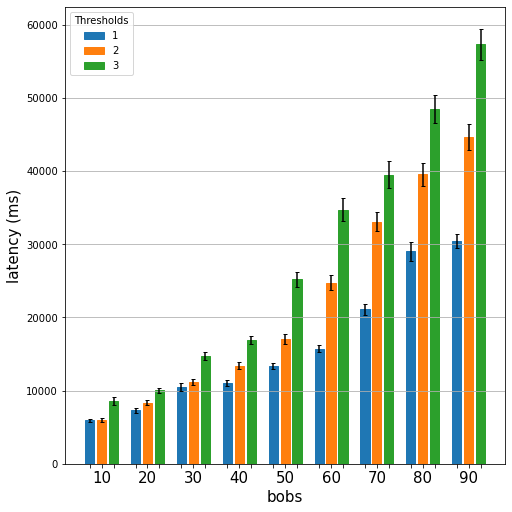

In [62]:
fig1, ax1 = plt.subplots(constrained_layout=True)
fig1.set_size_inches(7, 7)
# plt.yscale('log')
ax1.yaxis.grid(True)

bp1 = ax1.bar(positions, avg, .5, yerr=errLines,
            align='center', ecolor='black', capsize=2)

ax1.set_xticks(positions)
ax1.set_xticklabels(labels, fontsize=15)
ax1.set_ylabel("latency (ms)", fontsize=15)
ax1.set_xlabel("bobs", fontsize=15)

colors = list(mcolors.TABLEAU_COLORS) #['tab:blue', 'tab:red', 'tab:green']
patches = []
for i, bar in enumerate(bp1):
    bar.set_color(colors[i % tNum])
for i in range(tNum):    
    patches.append(mpatches.Patch(color=colors[i % tNum], label=trslds[i % tNum]))

ax1.legend(title='Thresholds', handles=patches, fontsize='medium')

plt.show()

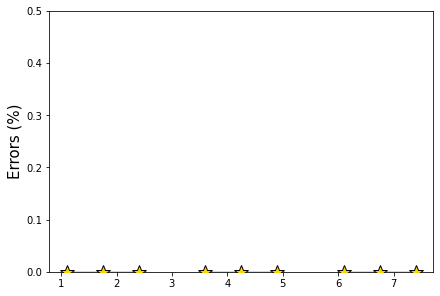

In [63]:
fig3, ax3 = plt.subplots(constrained_layout=True)
ylab2 = 'Errors (%)'
ax3.set_ylabel(ylab2, fontsize=15)
ax3.plot(positions[0:3], err[0:3], color='gold', marker='*', markeredgecolor='black', markersize=15, zorder=10)
ax3.plot(positions[3:6], err[3:6], color='gold', marker='*', markeredgecolor='black', markersize=15, zorder=10)
ax3.plot(positions[6:9], err[6:9], color='gold', marker='*', markeredgecolor='black', markersize=15, zorder=10)
ax3.set_ylim([0, 0.5])

star = mlines.Line2D([], [], color='gold', marker='*', linestyle='None', markeredgecolor='black',
                     markersize=15, label='Errors')
diamond = mlines.Line2D([], [], color='w', marker='D', linestyle='None', markeredgecolor='black',
                       markersize=10, label='Averages')
plt.show()


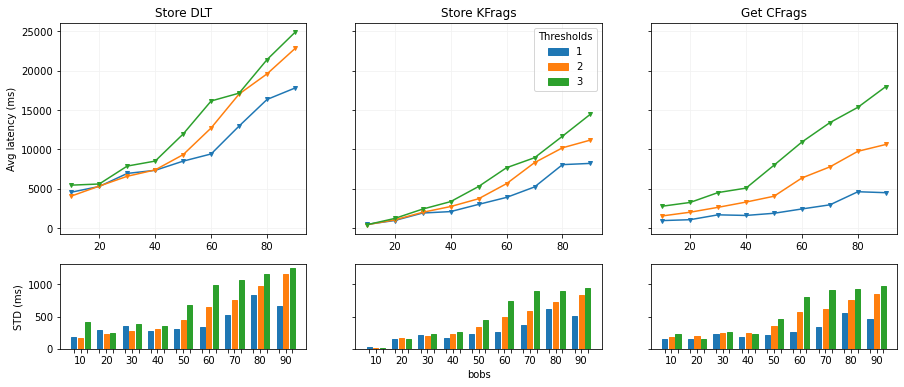

In [64]:
x_data = np.array([int(x) for x in list(bobsNumberTestData.keys())])
colors = list(mcolors.TABLEAU_COLORS) #['tab:blue', 'tab:red', 'tab:green']

fig, axs = plt.subplots(2, 3, sharey='row', figsize=(15, 6), gridspec_kw={'height_ratios': [2.5, 1]})

for t in range(tNum):
    bobsNumberXData = bobsNumberTestData[bobsNumber]
    tot = np.add(np.add(sdLatenciesPerThresh[t],skLatenciesPerThresh[t]), gcLatenciesPerThresh[t])
    a, b = np.polyfit(x_data, tot, deg=1)
    tot_est = a * x_data + b

    #plt.plot(x_data, tot_est, '--', color='tab:brown', alpha=0.5)
    axs[0][0].plot(x_data, sdLatenciesPerThresh[t], 'v', linestyle='-', color=colors[t], markersize=4)
    
    axs[0][1].plot(x_data, skLatenciesPerThresh[t], 'v', linestyle='-', color=colors[t], markersize=4)
    
    axs[0][2].plot(x_data, gcLatenciesPerThresh[t], 'v', linestyle='-', color=colors[t], markersize=4)
    
    #plt.plot(x_data, tot, 's', linestyle="--", color=colors[t], label='total')

patches = []

    
justTmp = [sdErrLines, skErrLines, gcErrLines]
for i in range(0,3):
    bp1 = axs[1][i].bar(positions, justTmp[i], .5, align='center')
    axs[1][i].set_xticks(positions)
    axs[1][i].set_xticklabels(labels)
    for j, bar in enumerate(bp1):
        bar.set_color(colors[j % tNum])
    
axs[0][0].set_ylabel('Avg latency (ms)')
axs[1][0].set_ylabel('STD (ms)')
axs[1][1].set_xlabel('bobs')
axs[0][0].set_title('Store DLT')
axs[0][1].set_title('Store KFrags')
axs[0][2].set_title('Get CFrags')
axs[0][0].grid(color='0.95')
axs[0][1].grid(color='0.95')
axs[0][2].grid(color='0.95')

patches = []
for i in range(tNum):    
    patches.append(mpatches.Patch(color=colors[i % tNum], label=trslds[i % tNum]))
axs[0][1].legend(title='Thresholds', handles=patches)

In [66]:
matrx = []
for bobsNumber in bobsNumberTestData:
    bobsNumberXData = bobsNumberTestData[bobsNumber]
    mulNum = 0
    matrixThreshold = []
    for thresholdXData in bobsNumberXData:
        matrixTests = []
        for textXData in thresholdXData['singleTests']:
            matrixBobs = []
            for bobXData in textXData['bobs']:
                tmpSD = np.array(bobXData['storeDLT'])
                tmpSK = np.array(bobXData['storeKfrags'])
                tmpGC = np.array(bobXData['getCfrags'])
                tmpTot = tmpSD + tmpSK + tmpGC
                matrixBobs.append(tmpTot)
            matrixTests.append(np.mean(matrixBobs, axis=0).tolist())
        matrixThreshold.append(np.mean(matrixTests, axis=0).tolist())
    matrx.append(matrixThreshold)
avgLatencyPerCycle = np.mean(matrx, axis=0)
matrxT1 = matrx.copy()
for i, row in enumerate(matrxT1):
    matrxT1[i] = row[0]
matrxT2 = matrx.copy()
for i, row in enumerate(matrxT2):
    matrxT2[i] = row[1]
matrxT3 = matrx.copy()
for i, row in enumerate(matrxT3):
    matrxT3[i] = row[2]

Text(0.5, 1.0, 'Threshold 3')

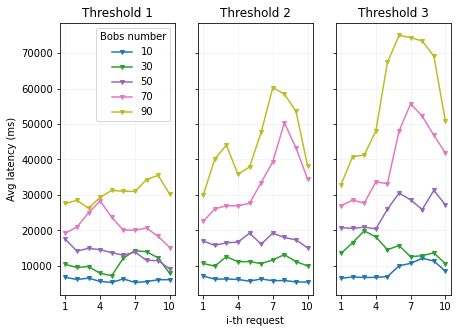

In [67]:
colors = list(mcolors.TABLEAU_COLORS).copy() #['tab:blue', 'tab:red', 'tab:green']

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(7, 5))

bobsNumberStrTmp = list(bobsNumberTestData.keys())

for c in range(len(matrxT1)):
    if not c % 2:
        axs[0].plot(range(1,11), matrxT1[c], 'v', linestyle='-', color=colors[c], label=bobsNumberStrTmp[c], markersize=4)
        axs[1].plot(range(1,11),matrxT2[c], 'v', linestyle='-', color=colors[c], markersize=4)
        axs[2].plot(range(1,11),matrxT3[c], 'v', linestyle='-', color=colors[c], markersize=4)
        axs[0].set_xticks(range(1,11,3))
        axs[0].grid(color='0.95')
        axs[1].set_xticks(range(1,11,3))
        axs[1].grid(color='0.95')
        axs[2].set_xticks(range(1,11,3))
        axs[2].grid(color='0.95')

axs[0].legend(title='Bobs number')  
axs[0].set_ylabel('Avg latency (ms)')
axs[1].set_xlabel('i-th request')
axs[0].set_title('Threshold 1')
axs[1].set_title('Threshold 2')
axs[2].set_title('Threshold 3')

In [68]:
kfragsData = {'x':[], 'tot':[]} 
payloadData = {'x':[], 'enc':[], 'dec':[]} 
path = os.walk(startingDirRust)
startDir = next(path)
for file in startDir[2]:
    with open(startingDirRust + '/' + file, 'r') as singleBobCSV:
        reader = csv.reader(singleBobCSV)
        columns = next(reader)
        if 'NodesNum' in columns:
            for row in reader:
                kfragsData['x'].append(int(row[0]))
                kfragsData['tot'].append(int(row[2]))
        else:
            for row in reader:
                payloadData['x'].append(int(row[0]))
                payloadData['enc'].append(int(row[1]))
                payloadData['dec'].append(int(row[2]))

/tmp/ipykernel_555296/3455912898.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(['10B', '50B', '100B', '500B', '1KB', '5KB', '10KB', '50KB', '100KB', '500KB', '1MB', '5MB', '10MB'])


Text(0.5, 0, 'Payload Size (Bytes)')

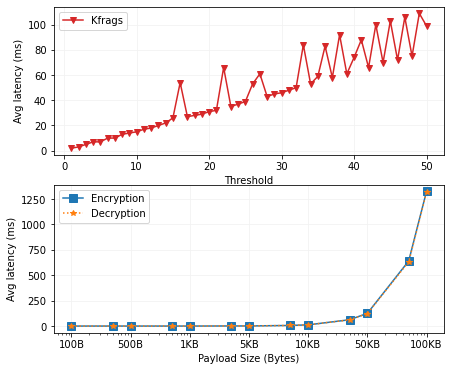

In [69]:
fig, axs = plt.subplots(2, 1, figsize=(7, 6))

axs[0].plot(kfragsData['x'], kfragsData['tot'], 'v', linestyle='-', color=colors[3], label='Kfrags', markersize=6)
axs[1].plot(payloadData['x'], payloadData['enc'], 's', linestyle='-', color=colors[0], label='Encryption', markersize=8)
axs[1].plot(payloadData['x'], payloadData['dec'], '*', linestyle=':', color=colors[1], label='Decryption', markersize=6)
#axs[0].set_xticks(range(1,11,3))
axs[0].grid(color='0.95')
#axs[1].set_xticks(range(1,11,3))
axs[1].grid(color='0.95')
axs[1].set_xscale('log')

axs[1].set_xticklabels(['10B', '50B', '100B', '500B', '1KB', '5KB', '10KB', '50KB', '100KB', '500KB', '1MB', '5MB', '10MB'])
axs[0].legend(title='')
axs[0].set_ylabel('Avg latency (ms)')
axs[0].set_xlabel('Threshold')
axs[1].legend(title='')
axs[1].set_ylabel('Avg latency (ms)')
axs[1].set_xlabel('Payload Size (Bytes)')